In [1]:
from keras.utils import to_categorical 
from tensorflow.keras.preprocessing.image import load_img 
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D 
import os 
import pandas as pd 
import numpy as np 

In [2]:
TRAIN_DIR = 'images/train' 
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = [] 
    labels = [] 
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename)) 
            labels.append(label) 
        print(label, "completed") 
    return image_paths,labels 

In [4]:
train = pd.DataFrame() 
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame() 
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [8]:
print(test['image']) 

0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name: image, Length: 7066, dtype: object


In [9]:
from tensorflow.keras.preprocessing.image import load_img

In [10]:
from tqdm.notebook import tqdm 
def extract_features(images):
    features = [] 
    for image in tqdm(images):
        # Load the image in grayscale mode
        img = load_img(image, color_mode='grayscale', target_size=(48, 48))  
        img = np.array(img) 
        features.append(img) 
    
    features = np.array(features) 
    features = features.reshape(len(features), 48, 48, 1) 
    return features

In [11]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0 
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder() 
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label']) 
y_test = le.transform(test['label']) 
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7) 

In [17]:
model = Sequential () 
# convolutional layers 
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1))) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.4)) 
model.add(Conv2D(256, kernel_size=(3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.4)) 
model.add(Conv2D(512, kernel_size=(3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.4)) 
model.add(Conv2D(512, kernel_size=(3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.4)) 
model.add(Flatten()) 
# fully connected layers 
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.4)) 
model.add(Dense(256, activation='relu')) 
model.add(Dropout(0.3)) 
# output layer 
model.add(Dense(7, activation='softmax')) 

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 1, validation_data = (x_test,y_test))

  1/226 [..............................] - ETA: 25:52 - loss: 1.9783 - accuracy: 0.2109

KeyboardInterrupt: 

In [19]:
from keras.models import Sequential, model_from_json

In [20]:
model_json = model.to_json() 
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json) 
model.save("emotiondetector.keras") 

In [21]:
from keras.models import Sequential, model_from_json

# Load JSON model
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()

# Load model with custom objects (if any)
model = model_from_json(model_json, custom_objects={'Sequential': Sequential})
model.load_weights("facialemotionmodel.h5")

In [22]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise'] 

In [23]:
def ef(image):
    img = load_img(image, color_mode="grayscale" ) 
    feature = np.array(img) 
    feature = feature.reshape(1,48,48,1) 
    return feature/255.0 

In [24]:
image = 'images/train/sad/42.jpg' 
img = ef(image) 
pred = model.predict(img) 
pred_label = label[pred.argmax()] 
print("model prediction is ",pred_label) 

1/1 [==============================] - 0s 213ms/step
model prediction is  sad


In [25]:
import matplotlib.pyplot as plt 
%matplotlib inline

1/1 [==============================] - 0s 48ms/step
model prediction is  sad


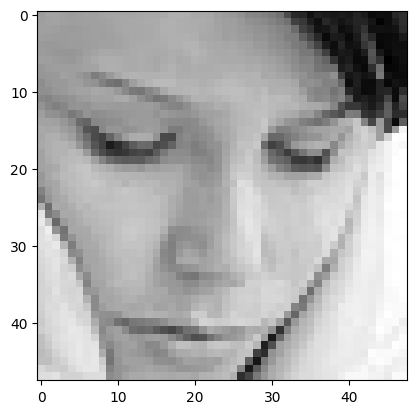

In [26]:
image = 'images/train/sad/42.jpg' 
img = ef(image) 
pred = model.predict(img) 
pred_label = label[pred.argmax()] 
print("model prediction is ",pred_label) 
plt.imshow(img.reshape(48,48),cmap='gray') 

In [32]:
import pyttsx3
engine = pyttsx3.init() 
def announce_prediction(emotion): 
    engine.say("The predicted emotion is " + emotion) 
    engine.runAndWait()

1/1 [==============================] - 0s 25ms/step
Model predicted is fear


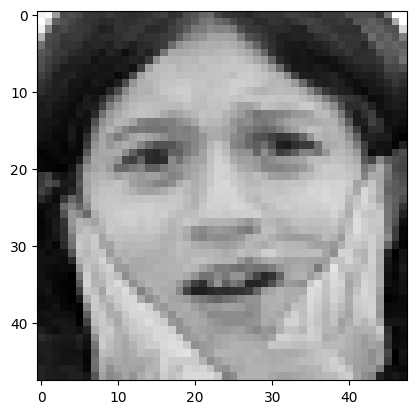

In [33]:
image = 'images/train/fear/994.jpg' 
img = ef(image) 
pred = model.predict(img) 
pred_label = label[pred.argmax()] 
print("Model predicted is", pred_label) 
plt.imshow(img.reshape(48,48),cmap='gray') 
announce_prediction(pred_label)  

1/1 [==============================] - 0s 28ms/step
Model predicted is angry


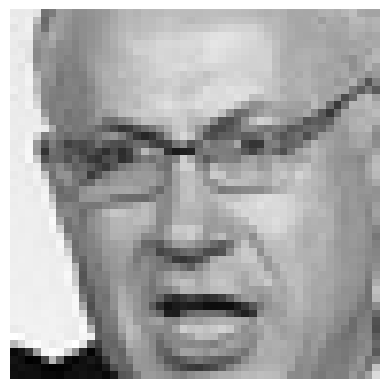

Press 's' to stop the music.


 s


In [35]:
import pygame
import matplotlib.pyplot as plt

# Initialize pygame mixer
pygame.mixer.init()

def announce_prediction(emotion):
    # Play corresponding music based on the predicted emotion
    if emotion == "happy":
        pygame.mixer.music.load('Happy.mp3')
    elif emotion == "sad":
        pygame.mixer.music.load('Sad.mp3')
    elif emotion == "fear":
        pygame.mixer.music.load('Fear.mp3')
    elif emotion == "angry":
        pygame.mixer.music.load('Angry.mp3')
    else:
        print("No music for this emotion.")
        return

    # Play the music
    pygame.mixer.music.play()

    # Wait for user input to stop the music
    print("Press 's' to stop the music.")
    while True:
        user_input = input()
        if user_input == 's':
            pygame.mixer.music.stop()  # Stop the music
            break

# Example usage
image = 'images/train/happy/971.jpg' 
img = ef(image) 
pred = model.predict(img) 
pred_label = label[pred.argmax()] 
print("Model predicted is", pred_label) 

# Display the image
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.axis('off')  # Hide axes for better visualization
plt.show()  # This will block the code until the image window is closed

# Play music based on the predicted emotion
announce_prediction(pred_label)